# Impact Analysis of Stay Duration on Bookings Cancellation Rates

## Prepare dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
df_clean = pd.read_csv('https://raw.githubusercontent.com/mchosasih99/dataset/main/1%20booking_hotel_clean.csv')

warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [2]:
#Select the columns

stay = df_clean[['hotel', 'is_canceled', 'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'reservation_status']]
stay['stay_nights'] = stay['stays_in_weekend_nights'] + stay['stays_in_weekdays_nights']
stay = stay.drop(['stays_in_weekend_nights', 'stays_in_weekdays_nights'], axis=1)

In [3]:
#Separate canceled and non-cancelled bookings

stay_non_canceled = stay[stay['is_canceled']==0]
stay_canceled = stay[stay['is_canceled']==1]

print('Non_canceled')
print(stay_non_canceled['stay_nights'].describe())
print(('*'*100))
print('Canceled')
print(stay_canceled['stay_nights'].describe())

Non_canceled
count    62393.000000
mean         3.501531
std          2.703626
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         69.000000
Name: stay_nights, dtype: float64
****************************************************************************************************
Canceled
count    23736.000000
mean         4.014788
std          2.905548
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         56.000000
Name: stay_nights, dtype: float64


In [4]:
#Grouping dataset
stay_non_canceled['stay_category'] = np.where(stay_non_canceled['stay_nights'] > 7, 'Long', 
                                 (np.where(stay_non_canceled['stay_nights'] > 3, 'Mid', 'Short')))
stay_canceled['stay_category'] = np.where(stay_canceled['stay_nights'] > 10, 'Long', 
                                 (np.where(stay_canceled['stay_nights'] > 3, 'Mid', 'Short')))

## Grouped dataframe

In [5]:
#Non_canceled
stay_non_canceled_group = stay_non_canceled.groupby(['hotel', 'stay_category']).agg({'stay_category':'count'})
stay_non_canceled_group.columns = ['total_category']
stay_non_canceled_group = stay_non_canceled_group.reset_index()
stay_non_canceled_group['canceled'] = 'No'

#Canceled
stay_canceled_group = stay_canceled.groupby(['hotel', 'stay_category']).agg({'stay_category': 'count'})
stay_canceled_group.columns = ['total_category']
stay_canceled_group = stay_canceled_group.reset_index()
stay_canceled_group['canceled'] = 'Yes'

#Append dataframe
stay_duration = stay_non_canceled_group.append(stay_canceled_group)
stay_duration = stay_duration.sort_values('hotel', ignore_index=True)
stay_duration

,hotel,stay_category,total_category,canceled
0,City Hotel,Long,545,No
1,City Hotel,Mid,11526,No
2,City Hotel,Short,24650,No
3,City Hotel,Long,273,Yes
4,City Hotel,Mid,5984,Yes
5,City Hotel,Short,9597,Yes
6,Resort Hotel,Long,2655,No
7,Resort Hotel,Mid,9757,No
8,Resort Hotel,Short,13260,No
9,Resort Hotel,Long,368,Yes


In [6]:
# #Export dataframe
stay_duration.to_csv('stay_duration.csv', index=False)

## Cancel vs Valid Bookings

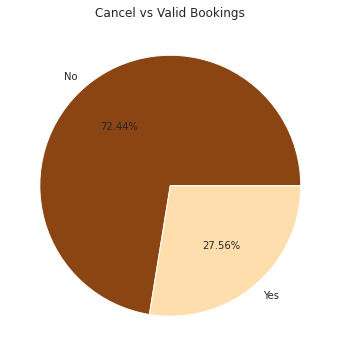

In [7]:
cancel_percentage = stay_duration.groupby('canceled').agg({'total_category':'sum'}).reset_index()

plt.figure(figsize=(6,6))
plt.pie(cancel_percentage.total_category, labels = cancel_percentage.canceled,
        autopct='%.2f%%', colors=['saddlebrown', 'navajowhite'])
plt.title('Cancel vs Valid Bookings')
plt.show()

## Cancellation Rate on Hotel Type

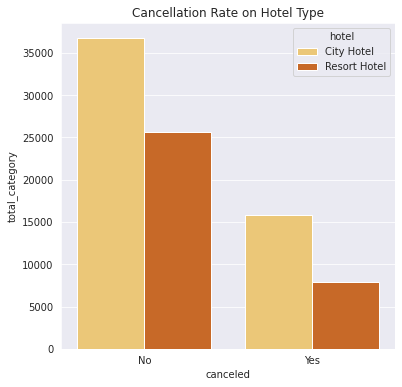

In [8]:
plt.figure(figsize=(6,6))
cancel_hotel_type = stay_duration.groupby(['hotel', 'canceled']).agg({'total_category':'sum'}).reset_index()
sns.barplot(data=cancel_hotel_type, x='canceled', y='total_category', hue='hotel', palette='YlOrBr')
plt.title('Cancellation Rate on Hotel Type')
plt.show()

## Stay Duration Cancellation Rate by Hotel

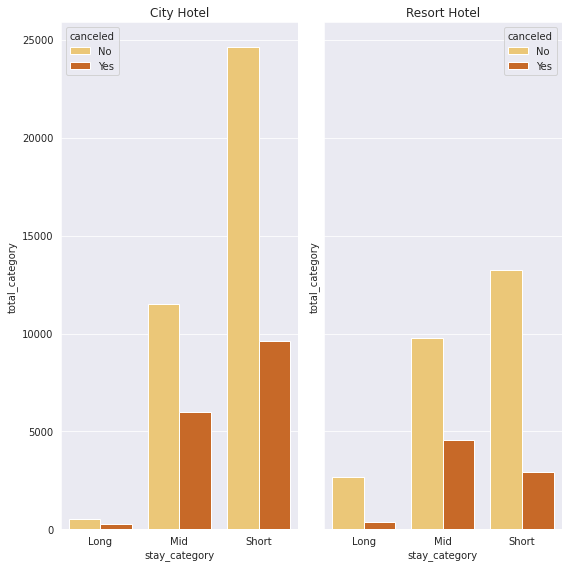

In [9]:
fig, ax = plt.subplots(1,2, figsize=(8,8), sharey=True)
sns.barplot(data=stay_duration[0:6], x='stay_category', y='total_category', hue='canceled', palette='YlOrBr', ax=ax[0])
sns.barplot(data=stay_duration[6:], x='stay_category', y='total_category', hue='canceled', palette='YlOrBr', ax=ax[1])
ax[0].set_title('City Hotel')
ax[1].set_title('Resort Hotel')
plt.tight_layout()
plt.show()
